# Alpha lifetimes

**Combine measurements of lifetimes to show its evolution.**

In [39]:
import time
import datetime
import glob
import collections
print(datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S'))

import numpy as np
import tables as tb
import matplotlib.pyplot as plt

import invisible_cities.core.core_functions as coref

from icaro.core.kdst_functions import event_rate
from icaro.core.kdst_functions import profile_and_fit
from icaro.core.kdst_functions import lifetime
from icaro.core.kdst_functions import load_lifetimes
from icaro.core.kdst_functions import str_to_datetime
from icaro.core.kdst_functions import datetime_to_str
from icaro.core.kdst_functions import to_deltatime

2017-05-24 19:14:28


In [21]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
plt.rcParams["figure.figsize"] = 10, 8

# Configuration

In [23]:
filename  = "Lifetimes.txt"
min_run   = 0
max_run   = 100000
min_date  = datetime.datetime.strptime("2017-01-01-00:00:00", "%Y-%m-%d-%H:%M:%S")
max_date  = datetime.datetime.strptime("2116-12-31-23:59:59", "%Y-%m-%d-%H:%M:%S")

In [26]:
lifetimes = load_lifetimes(filename)
lifetimes = lifetimes[coref.in_range(lifetimes.Run, min_run, max_run+1)]
lifetimes = lifetimes[coref.in_range(np.array(list(map(str_to_datetime, lifetimes.Date_start.values))),
                                     min_date, max_date)]

# Lifetime evolution

In [35]:
a = str_to_datetime(lifetimes.Date_start.values[0])
b = str_to_datetime(lifetimes.Date_end  .values[0])
print(a)
print(b)
print(a + (b - a) * 0.5)

2017-05-24 08:38:43
2017-05-24 09:43:33
2017-05-24 09:11:08


/Applications/anaconda3/envs/IC3.5/lib/python3.5/site-packages/matplotlib/axes/_base.py:2903: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=4074, right=4074
  'left=%s, right=%s') % (left, right))


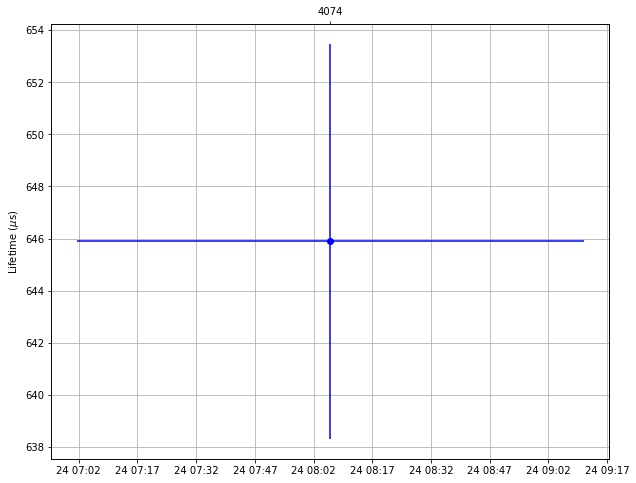

In [46]:
date0 = list(map(str_to_datetime, lifetimes.Date_start.values))
date1 = list(map(str_to_datetime, lifetimes.Date_end  .values))
ddate = list(map(lambda x,y: (x-y)*0.5, date0, date1))
datec = list(map(lambda x,y: (x+y)    , date0, ddate))
#datec = list(map(datetime_to_str, datec))
ddate = list(map(to_deltatime, date0, date1))

plt.errorbar(datec, lifetimes.LT, lifetimes.LTu, ddate, linestyle='--', fmt='o', c='blue')
plt.grid(True)
#plt.title('Lifetime evolution')
plt.ylabel('Lifetime ($\mu$s)')

ax2 = plt.gca().twiny()
ax2.set_xlim  (min(lifetimes.Run), max(lifetimes.Run))
ax2.set_xticks(lifetimes.Run);